In [13]:
%pylab inline
import pandas as pd
from IPython.display import display, HTML


Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastparquet
reload(fastparquet)

<module 'fastparquet' from '/home/spark/anaconda2/lib/python2.7/site-packages/fastparquet/__init__.pyc'>

In [3]:
%time train = fastparquet.ParquetFile('../input/train_v2.parq').to_pandas()

CPU times: user 6.59 s, sys: 4.14 s, total: 10.7 s
Wall time: 10.7 s


In [4]:
train.head()

customer_id market     date  f_0 f_1  f_2       f_3       f_4  f_5  \
0  219009981584     c2  4012017    1  c0    1 -0.000086 -0.000086   21   
1  144106027184     c5  4012017    9  c1    3 -0.000068 -0.000071   18   
2  144106028273    c20  4012017    4  c1    1 -0.000054 -0.000043   13   
3  144106028504     c5  4012017    3  c1    1 -0.000075 -0.000082   20   
4  144106029824     c5  4012017    8  c1    1 -0.000063 -0.000074   20   

        f_6  ...    f_33      f_34      f_35      f_36      f_37      f_38  \
0 -0.000086  ...     c12 -0.000086 -0.000085 -0.000086 -0.000086 -0.000086   
1 -0.000086  ...     c29 -0.000086 -0.000086  0.001401 -0.000086 -0.000086   
2 -0.000086  ...     c24 -0.000086 -0.000085  0.000176 -0.000084 -0.000071   
3 -0.000086  ...      c8 -0.000086 -0.000086 -0.000010 -0.000086 -0.000086   
4 -0.000086  ...     c30 -0.000086 -0.000086  0.000006 -0.000086 -0.000086   

       f_39      f_40      f_41 target  
0 -0.000086 -0.000086 -0.000086      1  
1 -0.000086  0.000027  0.000671      4  
2 -0.000086 -0.000047  0.000149      6  
3 -0.000086 -0.000081 -0.000051      2  
4 -0.000086 -0.000064 -0.000008      5  

[5 rows x 46 columns]

In [5]:
train.shape

(5203955, 46)

In [10]:
a=train.sort_values(['f_0',"f_1","f_2","f_3","f_4","f_5",'f_36','f_38'])

In [12]:
a.head()

customer_id market      date  f_0 f_1  f_2       f_3       f_4  f_5  \
2808460  184833582547     c0  10012016    1  c0    1 -0.000086 -0.000086    2   
769646   167201469774     c6   3012017    1  c0    1 -0.000086 -0.000086    7   
265029   192510176263    c11   4012017    1  c0    1 -0.000086 -0.000086    7   
37951    137527838237    c16   4012017    1  c0    1 -0.000086 -0.000086    8   
479707   137527838237    c16   3012017    1  c0    1 -0.000086 -0.000086    8   

              f_6  ...    f_33      f_34      f_35      f_36      f_37  \
2808460 -0.000086  ...     c30 -0.000086 -0.000086  0.001645 -0.000086   
769646  -0.000086  ...     c20 -0.000086 -0.000086  0.001963 -0.000086   
265029  -0.000086  ...     c23 -0.000086 -0.000084  0.003139 -0.000086   
37951   -0.000086  ...     c26 -0.000086 -0.000086 -0.000086 -0.000086   
479707  -0.000086  ...     c26 -0.000086 -0.000086 -0.000086 -0.000086   

             f_38      f_39      f_40      f_41 target  
2808460 -0.000086 -0.000086 -0.000086 -0.000086      0  
769646   0.007254 -0.000086 -0.000086 -0.000086     18  
265029   0.005533 -0.000086 -0.000086 -0.000086     13  
37951   -0.000086 -0.000086 -0.000086 -0.000086      6  
479707  -0.000086 -0.000086 -0.000086 -0.000086      9  

[5 rows x 46 columns]

In [6]:
train.customer_id.value_counts().head()

141908470801    53
137518055673    52
147408527220    52
137501057241    49
165020293799    47
Name: customer_id, dtype: int64

In [7]:
len(set(train['customer_id']))

1195191

In [10]:
train[train['customer_id']==219009981584]

customer_id market      date  f_0 f_1  f_2       f_3       f_4  f_5  \
0        219009981584     c2   4012017    1  c0    1 -0.000086 -0.000086   21   
294153   219009981584     c0   4012017    4  c0    1 -0.000086 -0.000086   21   
1160461  219009981584     c2   2012017    3  c0    1 -0.000086 -0.000086   21   
2409218  219009981584     c3  11012016    3  c1    2 -0.000086 -0.000086   22   
3707431  219009981584     c1   8012016    6  c1    2 -0.000086 -0.000086   22   

              f_6  ...    f_33      f_34      f_35      f_36      f_37  \
0       -0.000086  ...     c12 -0.000086 -0.000085 -0.000086 -0.000086   
294153  -0.000086  ...     c12 -0.000086 -0.000086 -0.000085 -0.000086   
1160461 -0.000086  ...     c12 -0.000086 -0.000085 -0.000086 -0.000086   
2409218 -0.000086  ...     c13 -0.000086 -0.000085 -0.000086 -0.000086   
3707431 -0.000086  ...     c13 -0.000086 -0.000086 -0.000086 -0.000086   

             f_38      f_39      f_40      f_41 target  
0       -0.000086 -0.000086 -0.000086 -0.000086      1  
294153  -0.000086 -0.000086 -0.000086 -0.000086      1  
1160461 -0.000086 -0.000086 -0.000086 -0.000086      1  
2409218 -0.000086 -0.000086 -0.000086 -0.000086      1  
3707431 -0.000086 -0.000086 -0.000086 -0.000086      1  

[5 rows x 46 columns]

In [11]:
train['date'].value_counts().sort_index()

1012017     420615
2012017     422329
3012017     437684
4012017     441215
5012016     464225
6012016     426306
7012016     458744
8012016     441772
9012016     431576
10012016    431927
11012016    420593
12012016    406969
Name: date, dtype: int64

In [18]:
lst=[]
for d in train['date'].value_counts().sort_index().index:
    subdf=train[train['date']==d]
    vc=subdf['target'].value_counts()
    vc.name=d%10000*100+d/1000000
    lst.append(vc)
tmpdf=pd.DataFrame(lst).sort_index().T
tmpdf

201605   201606   201607   201608   201609   201610   201611   201612  \
0    5531.0   5560.0   5602.0   5365.0   5164.0   5152.0   5000.0   5303.0   
1   74009.0  71256.0  73692.0  73680.0  72337.0  70797.0  68405.0  66284.0   
2   64337.0  60606.0  63497.0  62182.0  61120.0  59775.0  57876.0  56349.0   
3   53554.0  49096.0  52745.0  51146.0  50097.0  49659.0  48215.0  46313.0   
4   42511.0  38603.0  42092.0  40165.0  39504.0  39641.0  38519.0  37056.0   
5   60813.0  55077.0  59826.0  57090.0  55853.0  55976.0  54619.0  52927.0   
6   38868.0  35258.0  38822.0  36872.0  36104.0  36217.0  35164.0  34632.0   
7   45892.0  41215.0  45508.0  42795.0  41207.0  42344.0  41744.0  39984.0   
8   25031.0  22494.0  24737.0  23503.0  22558.0  23478.0  22850.0  21914.0   
9   25113.0  22369.0  24623.0  23402.0  22351.0  23067.0  22505.0  21633.0   
10  11503.0  10016.0  11064.0  10361.0  10088.0  10411.0  10171.0   9889.0   
11   5933.0   5283.0   5775.0   5521.0   5295.0   5410.0   5389.0   5010.0   
12   6206.0   5410.0   6140.0   5484.0   5536.0   5723.0   5743.0   5368.0   
13   3252.0   2735.0   2992.0   2797.0   2770.0   2798.0   2936.0   2809.0   
14   1501.0   1196.0   1444.0   1253.0   1432.0   1338.0   1293.0   1355.0   
15     76.0     60.0     87.0     73.0     84.0     60.0     78.0     61.0   
16     57.0     42.0     57.0     51.0     38.0     47.0     54.0     45.0   
17     20.0     15.0     25.0     20.0     30.0     25.0     23.0     24.0   
18     17.0     13.0     12.0     10.0      6.0      9.0      7.0      9.0   
20      1.0      2.0      4.0      2.0      2.0      NaN      2.0      4.0   

     201701   201702   201703   201704  
0    4994.0   4560.0   5001.0   5043.0  
1   68667.0  67070.0  68446.0  71095.0  
2   57653.0  58019.0  59448.0  60086.0  
3   47426.0  48091.0  49664.0  49508.0  
4   37783.0  38634.0  40201.0  39581.0  
5   53753.0  55039.0  57640.0  57325.0  
6   34828.0  35811.0  37480.0  37093.0  
7   41152.0  42452.0  44354.0  44135.0  
8   22984.0  23387.0  24214.0  24582.0  
9   23211.0  22816.0  23872.0  24447.0  
10  10912.0  10639.0  10932.0  11281.0  
11   5787.0   5415.0   5685.0   5800.0  
12   6405.0   5888.0   6054.0   6314.0  
13   3322.0   3000.0   3120.0   3215.0  
14   1563.0   1355.0   1415.0   1538.0  
15     94.0     68.0     76.0     84.0  
16     46.0     50.0     47.0     55.0  
17     24.0     25.0     17.0     22.0  
18      9.0     10.0     13.0      7.0  
20      2.0      NaN      5.0      4.0

In [23]:
tmpdf2=tmpdf.apply(lambda u: u/u.sum(),axis=0)
tmpdf2

201605    201606    201607    201608    201609    201610    201611  \
0   0.011914  0.013042  0.012212  0.012144  0.011965  0.011928  0.011888   
1   0.159425  0.167148  0.160639  0.166783  0.167611  0.163910  0.162639   
2   0.138590  0.142165  0.138415  0.140756  0.141620  0.138391  0.137606   
3   0.115362  0.115166  0.114977  0.115775  0.116079  0.114971  0.114636   
4   0.091574  0.090552  0.091755  0.090918  0.091534  0.091777  0.091583   
5   0.130999  0.129196  0.130413  0.129230  0.129416  0.129596  0.129862   
6   0.083727  0.082706  0.084627  0.083464  0.083656  0.083850  0.083606   
7   0.098857  0.096679  0.099201  0.096871  0.095480  0.098035  0.099250   
8   0.053920  0.052765  0.053923  0.053202  0.052269  0.054356  0.054328   
9   0.054097  0.052472  0.053675  0.052973  0.051789  0.053405  0.053508   
10  0.024779  0.023495  0.024118  0.023453  0.023375  0.024104  0.024183   
11  0.012780  0.012393  0.012589  0.012497  0.012269  0.012525  0.012813   
12  0.013369  0.012690  0.013384  0.012414  0.012827  0.013250  0.013655   
13  0.007005  0.006416  0.006522  0.006331  0.006418  0.006478  0.006981   
14  0.003233  0.002805  0.003148  0.002836  0.003318  0.003098  0.003074   
15  0.000164  0.000141  0.000190  0.000165  0.000195  0.000139  0.000185   
16  0.000123  0.000099  0.000124  0.000115  0.000088  0.000109  0.000128   
17  0.000043  0.000035  0.000054  0.000045  0.000070  0.000058  0.000055   
18  0.000037  0.000030  0.000026  0.000023  0.000014  0.000021  0.000017   
20  0.000002  0.000005  0.000009  0.000005  0.000005       NaN  0.000005   

      201612    201701    201702    201703    201704  
0   0.013030  0.011873  0.010797  0.011426  0.011430  
1   0.162872  0.163254  0.158810  0.156382  0.161135  
2   0.138460  0.137068  0.137379  0.135824  0.136183  
3   0.113800  0.112754  0.113871  0.113470  0.112208  
4   0.091054  0.089828  0.091478  0.091849  0.089709  
5   0.130052  0.127796  0.130323  0.131693  0.129925  
6   0.085097  0.082803  0.084794  0.085633  0.084070  
7   0.098248  0.097838  0.100519  0.101338  0.100031  
8   0.053847  0.054644  0.055376  0.055323  0.055714  
9   0.053156  0.055183  0.054024  0.054542  0.055408  
10  0.024299  0.025943  0.025191  0.024977  0.025568  
11  0.012311  0.013758  0.012822  0.012989  0.013146  
12  0.013190  0.015228  0.013942  0.013832  0.014310  
13  0.006902  0.007898  0.007103  0.007128  0.007287  
14  0.003329  0.003716  0.003208  0.003233  0.003486  
15  0.000150  0.000223  0.000161  0.000174  0.000190  
16  0.000111  0.000109  0.000118  0.000107  0.000125  
17  0.000059  0.000057  0.000059  0.000039  0.000050  
18  0.000022  0.000021  0.000024  0.000030  0.000016  
20  0.000010  0.000005       NaN  0.000011  0.000009

In [28]:
pd.concat([tmpdf2.mean(1),tmpdf.mean(1)/tmpdf.mean(1).sum()],axis=1)

0         1
0   0.011971  0.011967
1   0.162551  0.162518
2   0.138538  0.138538
3   0.114422  0.114435
4   0.091134  0.091140
5   0.129875  0.129889
6   0.084003  0.084003
7   0.098529  0.098537
8   0.054139  0.054138
9   0.053686  0.053692
10  0.024457  0.024456
11  0.012741  0.012741
12  0.013508  0.013503
13  0.006872  0.006869
14  0.003207  0.003206
15  0.000173  0.000173
16  0.000113  0.000113
17  0.000052  0.000052
18  0.000023  0.000023
20  0.000006  0.000006

In [12]:
W=[]
for i in range(21):
    b=[]
    for j in range(21):
        b.append((i-j)**2/20.0**2)
    W.append(b)
W=np.array(W)

In [13]:
pd.DataFrame(W)

0       1       2       3       4       5       6       7       8   \
0   0.0000  0.0025  0.0100  0.0225  0.0400  0.0625  0.0900  0.1225  0.1600   
1   0.0025  0.0000  0.0025  0.0100  0.0225  0.0400  0.0625  0.0900  0.1225   
2   0.0100  0.0025  0.0000  0.0025  0.0100  0.0225  0.0400  0.0625  0.0900   
3   0.0225  0.0100  0.0025  0.0000  0.0025  0.0100  0.0225  0.0400  0.0625   
4   0.0400  0.0225  0.0100  0.0025  0.0000  0.0025  0.0100  0.0225  0.0400   
5   0.0625  0.0400  0.0225  0.0100  0.0025  0.0000  0.0025  0.0100  0.0225   
6   0.0900  0.0625  0.0400  0.0225  0.0100  0.0025  0.0000  0.0025  0.0100   
7   0.1225  0.0900  0.0625  0.0400  0.0225  0.0100  0.0025  0.0000  0.0025   
8   0.1600  0.1225  0.0900  0.0625  0.0400  0.0225  0.0100  0.0025  0.0000   
9   0.2025  0.1600  0.1225  0.0900  0.0625  0.0400  0.0225  0.0100  0.0025   
10  0.2500  0.2025  0.1600  0.1225  0.0900  0.0625  0.0400  0.0225  0.0100   
11  0.3025  0.2500  0.2025  0.1600  0.1225  0.0900  0.0625  0.0400  0.0225   
12  0.3600  0.3025  0.2500  0.2025  0.1600  0.1225  0.0900  0.0625  0.0400   
13  0.4225  0.3600  0.3025  0.2500  0.2025  0.1600  0.1225  0.0900  0.0625   
14  0.4900  0.4225  0.3600  0.3025  0.2500  0.2025  0.1600  0.1225  0.0900   
15  0.5625  0.4900  0.4225  0.3600  0.3025  0.2500  0.2025  0.1600  0.1225   
16  0.6400  0.5625  0.4900  0.4225  0.3600  0.3025  0.2500  0.2025  0.1600   
17  0.7225  0.6400  0.5625  0.4900  0.4225  0.3600  0.3025  0.2500  0.2025   
18  0.8100  0.7225  0.6400  0.5625  0.4900  0.4225  0.3600  0.3025  0.2500   
19  0.9025  0.8100  0.7225  0.6400  0.5625  0.4900  0.4225  0.3600  0.3025   
20  1.0000  0.9025  0.8100  0.7225  0.6400  0.5625  0.4900  0.4225  0.3600   

        9    ...        11      12      13      14      15      16      17  \
0   0.2025   ...    0.3025  0.3600  0.4225  0.4900  0.5625  0.6400  0.7225   
1   0.1600   ...    0.2500  0.3025  0.3600  0.4225  0.4900  0.5625  0.6400   
2   0.1225   ...    0.2025  0.2500  0.3025  0.3600  0.4225  0.4900  0.5625   
3   0.0900   ...    0.1600  0.2025  0.2500  0.3025  0.3600  0.4225  0.4900   
4   0.0625   ...    0.1225  0.1600  0.2025  0.2500  0.3025  0.3600  0.4225   
5   0.0400   ...    0.0900  0.1225  0.1600  0.2025  0.2500  0.3025  0.3600   
6   0.0225   ...    0.0625  0.0900  0.1225  0.1600  0.2025  0.2500  0.3025   
7   0.0100   ...    0.0400  0.0625  0.0900  0.1225  0.1600  0.2025  0.2500   
8   0.0025   ...    0.0225  0.0400  0.0625  0.0900  0.1225  0.1600  0.2025   
9   0.0000   ...    0.0100  0.0225  0.0400  0.0625  0.0900  0.1225  0.1600   
10  0.0025   ...    0.0025  0.0100  0.0225  0.0400  0.0625  0.0900  0.1225   
11  0.0100   ...    0.0000  0.0025  0.0100  0.0225  0.0400  0.0625  0.0900   
12  0.0225   ...    0.0025  0.0000  0.0025  0.0100  0.0225  0.0400  0.0625   
13  0.0400   ...    0.0100  0.0025  0.0000  0.0025  0.0100  0.0225  0.0400   
14  0.0625   ...    0.0225  0.0100  0.0025  0.0000  0.0025  0.0100  0.0225   
15  0.0900   ...    0.0400  0.0225  0.0100  0.0025  0.0000  0.0025  0.0100   
16  0.1225   ...    0.0625  0.0400  0.0225  0.0100  0.0025  0.0000  0.0025   
17  0.1600   ...    0.0900  0.0625  0.0400  0.0225  0.0100  0.0025  0.0000   
18  0.2025   ...    0.1225  0.0900  0.0625  0.0400  0.0225  0.0100  0.0025   
19  0.2500   ...    0.1600  0.1225  0.0900  0.0625  0.0400  0.0225  0.0100   
20  0.3025   ...    0.2025  0.1600  0.1225  0.0900  0.0625  0.0400  0.0225   

        18      19      20  
0   0.8100  0.9025  1.0000  
1   0.7225  0.8100  0.9025  
2   0.6400  0.7225  0.8100  
3   0.5625  0.6400  0.7225  
4   0.4900  0.5625  0.6400  
5   0.4225  0.4900  0.5625  
6   0.3600  0.4225  0.4900  
7   0.3025  0.3600  0.4225  
8   0.2500  0.3025  0.3600  
9   0.2025  0.2500  0.3025  
10  0.1600  0.2025  0.2500  
11  0.1225  0.1600  0.2025  
12  0.0900  0.1225  0.1600  
13  0.0625  0.0900  0.1225  
14  0.0400  0.0625  0.0900  
15  0.0225  0.0400  0.0625  
16  0.0100  0.0225  0.0400  
17  0.0025  0.0100  0.0225  
18  0.0000  0.0025  0.0

In [14]:
D=1012017

In [42]:
def make_E(D):
    df=train[train['date']==D]['target']
    M=df.shape[0]
    vc=df.value_counts().sort_index()
    vc=vc.loc[range(21)].fillna(0).values
    E=np.outer(vc,vc)/float(M)
    return E

In [43]:
Elist=[]

In [44]:
for D in sorted(train['date'].value_counts().index):
    print D
    Elist.append(make_E(D))

1012017
2012017
3012017
4012017
5012016
6012016
7012016
8012016
9012016
10012016
11012016
12012016


In [45]:
type(Elist[0])

numpy.ndarray

In [46]:
[u.shape for u in Elist]

[(21, 21),
 (21, 21),
 (21, 21),
 (21, 21),
 (21, 21),
 (21, 21),
 (21, 21),
 (21, 21),
 (21, 21),
 (21, 21),
 (21, 21),
 (21, 21)]

In [47]:
Elist=np.array(Elist)

In [48]:
Elist.shape

(12, 21, 21)

In [49]:
pd.DataFrame(np.mean(Elist,axis=0))

0             1            2            3            4   \
0    62.256020    843.904555   719.261193   593.976700   472.960525   
1   843.904555  11458.882981  9766.278251  8066.022423  6423.114346   
2   719.261193   9766.278251  8324.871136  6875.908968  5475.655542   
3   593.976700   8066.022423  6875.908968  5679.543465  4523.148970   
4   472.960525   6423.114346  5475.655542  4523.148970  3602.465407   
5   674.002243   9153.355208  7803.333022  6445.918436  5133.948461   
6   435.873771   5919.521484  5046.449942  4168.643094  3320.284413   
7   511.114027   6942.487490  5918.815039  4889.509151  3894.672052   
8   280.775432   3814.391445  3251.763180  2686.246158  2139.710628   
9   278.497522   3783.076753  3225.001282  2664.085725  2121.988193   
10  126.796703   1722.822164  1468.714767  1213.298022   966.489902   
11   66.068537    897.702508   765.228051   632.132864   503.509310   
12   69.980463    951.146647   810.789493   669.814002   533.610624   
13   35.597988    483.779970   412.406555   340.699126   271.426235   
14   16.615744    225.826698   192.485361   159.011236   126.677521   
15    0.896554     12.199679    10.395596     8.587969     6.840513   
16    0.586469      7.968087     6.794504     5.615129     4.473450   
17    0.268833      3.659571     3.117108     2.574963     2.051001   
18    0.121924      1.648509     1.408645     1.163976     0.927098   
19    0.000000      0.000000     0.000000     0.000000     0.000000   
20    0.028130      0.377899     0.322365     0.266289     0.212477   

             5            6            7            8            9     ...     \
0    674.002243   435.873771   511.114027   280.775432   278.497522    ...      
1   9153.355208  5919.521484  6942.487490  3814.391445  3783.076753    ...      
2   7803.333022  5046.449942  5918.815039  3251.763180  3225.001282    ...      
3   6445.918436  4168.643094  4889.509151  2686.246158  2664.085725    ...      
4   5133.948461  3320.284413  3894.672052  2139.710628  2121.988193    ...      
5   7316.807528  4732.014651  5550.843383  3049.629801  3024.403948    ...      
6   4732.014651  3060.469642  3590.017878  1972.374947  1956.013077    ...      
7   5550.843383  3590.017878  4211.800607  2314.048940  2294.855079    ...      
8   3049.629801  1972.374947  2314.048940  1271.475069  1260.942844    ...      
9   3024.403948  1956.013077  2294.855079  1260.942844  1250.600036    ...      
10  1377.566155   890.960904  1045.411517   574.462157   569.759793    ...      
11   717.635221   464.120923   544.566023   299.243077   296.811363    ...      
12   760.574323   491.930847   577.292047   317.265469   314.685936    ...      
13   386.899249   250.240585   293.680657   161.402109   160.099254    ...      
14   180.562239   116.796111   137.029910    75.314005    74.709689    ...      
15     9.749469     6.305889     7.399118     4.066645     4.035623    ...      
16     6.376777     4.123969     4.841494     2.660097     2.638204    ...      
17     2.921299     1.890306     2.215441     1.217742     1.207231    ...      
18     1.321751     0.854272     1.002838     0.550348     0.546145    ...      
19     0.000000     0.000000     0.000000     0.000000     0.000000    ...      
20     0.303502     0.196628     0.230642     0.126574     0.125634    ...      

            11          12          13          14         15        16  \
0    66.068537   69.980463   35.597988   16.615744   0.896554  0.586469   
1   897.702508  951.146647  483.779970  225.826698  12.199679  7.968087   
2   765.228051  810.789493  412.406555  192.485361  10.395596  6.794504   
3   632.132864  669.814002  340.699126  159.011236   8.587969  5.615129   
4   503.509310  533.610624  271.426235  126.677521   6.840513  4.473450   
5   717.635221  760.574323  386.899249  180.562239   9.749469  6.376777   
6   464.120923  491.930847  250.240585  116.796111   6.305889  4.123969   
7   544.566023  577.292047  293.680657  137.029910   7.399118  4.8

/home/spark/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


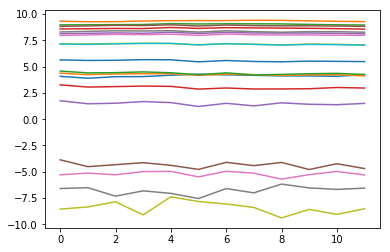

In [50]:
for i in range(20):
    plt.plot(np.log(Elist[:,i,i]))

/home/spark/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


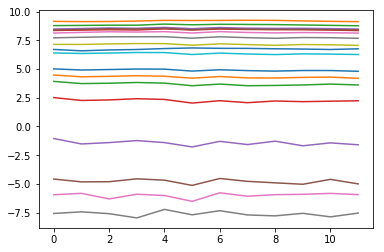

In [51]:
for i in range(1,20):
    plt.plot(np.log(Elist[:,i,i-1]))

/home/spark/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


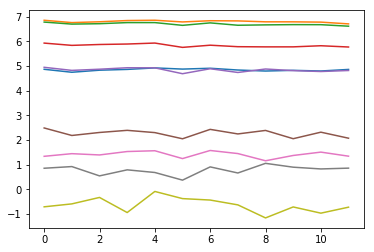

In [52]:
for i in range(10,20):
    plt.plot(np.log(Elist[:,i,i-10]))

In [53]:
df=train[train['date']==D]['target']
df.shape

(406969,)

In [54]:
M=df.shape[0]

In [55]:
vc=df.value_counts().sort_index().values
vc

array([ 5303, 66284, 56349, 46313, 37056, 52927, 34632, 39984, 21914,
       21633,  9889,  5010,  5368,  2809,  1355,    61,    45,    24,
           9,     4])

In [56]:
E=np.outer(vc,vc)/float(M)

In [57]:
pd.DataFrame(E)

0             1            2            3            4   \
0    69.100617    863.712106   734.254322   603.480459   482.857338   
1   863.712106  10795.831270  9177.694409  7543.107441  6035.398038   
2   734.254322   9177.694409  7802.092545  6412.506203  5130.780340   
3   603.480459   7543.107441  6412.506203  5270.411184  4216.966226   
4   482.857338   6035.398038  5130.780340  4216.966226  3374.082881   
5   689.664031   8620.345206  7328.281818  6023.083210  4819.194858   
6   451.271463   5640.595446  4795.152869  3941.115456  3153.368910   
7   521.010573   6512.288297  5536.191739  4550.172106  3640.687875   
8   285.549863   3569.184818  3034.216331  2493.809312  1995.348992   
9   281.888299   3523.417685  2995.309021  2461.831562  1969.762925   
10  128.858382   1610.644732  1369.232696  1125.366446   900.429232   
11   65.282687    815.990505   693.685490   570.137111   456.178628   
12   69.947598    874.298809   743.254233   610.877448   488.775823   
13   36.602609    457.508449   388.934639   319.663702   255.769614   
14   17.656296    220.692043   187.613541   154.198760   123.377653   
15    0.794859      9.935214     8.446071     6.941789     5.554271   
16    0.586371      7.329256     6.230708     5.120992     4.097413   
17    0.312731      3.908937     3.323044     2.731196     2.185287   
18    0.117274      1.465851     1.246142     1.024198     0.819483   
19    0.052122      0.651489     0.553841     0.455199     0.364214   

             5            6            7            8            9   \
0    689.664031   451.271463   521.010573   285.549863   281.888299   
1   8620.345206  5640.595446  6512.288297  3569.184818  3523.417685   
2   7328.281818  4795.152869  5536.191739  3034.216331  2995.309021   
3   6023.083210  3941.115456  4550.172106  2493.809312  2461.831562   
4   4819.194858  3153.368910  3640.687875  1995.348992  1969.762925   
5   6883.244987  4503.949598  5199.986161  2849.952399  2813.407879   
6   4503.949598  2947.092835  3402.534070  1864.824220  1840.911853   
7   5199.986161  3402.534070  3928.358809  2153.012578  2125.404815   
8   2849.952399  1864.824220  2153.012578  1179.999941  1164.868975   
9   2813.407879  1840.911853  2125.404815  1164.868975  1149.932032   
10  1286.081011   841.528097   971.577137   532.491531   525.663471   
11   651.558890   426.337927   492.223830   269.772735   266.313478   
12   698.117390   456.802793   527.396711   289.049908   285.343464   
13   365.315154   239.038571   275.979389   151.255811   149.316280   
14   176.220019   115.306964   133.126405    72.962486    72.026899   
15     7.933152     5.190941     5.993144     3.284658     3.242539   
16     5.852325     3.829383     4.421172     2.423108     2.392037   
17     3.121240     2.042337     2.357958     1.292324     1.275753   
18     1.170465     0.765877     0.884234     0.484622     0.478407   
19     0.520207     0.340390     0.392993     0.215387     0.212626   

             10          11          12          13          14        15  \
0    128.858382   65.282687   69.947598   36.602609   17.656296  0.794859   
1   1610.644732  815.990505  874.298809  457.508449  220.692043  9.935214   
2   1369.232696  693.685490  743.254233  388.934639  187.613541  8.446071   
3   1125.366446  570.137111  610.877448  319.663702  154.198760  6.941789   
4    900.429232  456.178628  488.775823  255.769614  123.377653  5.554271   
5   1286.081011  651.558890  698.117390  365.315154  176.220019  7.933152   
6    841.528097  426.337927  456.802793  239.038571  115.306964  5.190941   
7    971.577137  492.223830  527.396711  275.979389  133.126405  5.993144   
8    532.491531  269.772735  289.049908  151.255811   72.962486  3.284658   
9    525.663471  266.313478  285.343464  149.316280   72.026899  3.242539   
10   240.294275  121.738732  130.437827   68.256307   32.925346  1.482248   
11   121.738732   61.675705   66.082871   34.580251   16.680755  0.750942   
12   130.437827   66.082871